In [ ]:
# When One class has higher percentage than other class

#Handling Class Imbalance Problem 
#   -> Upsampling
#   -> Downsampling
#   -> Smote

In [2]:
import pandas as pd
import numpy as np

np.random.seed(1) # for reproducibility

no_samples=1000
class_0_ratio=0.9
no_class_0=int(no_samples*class_0_ratio)
no_class_1=100

In [3]:
no_class_0,no_class_1


(900, 100)

In [4]:
class_0={"Feature1":np.random.normal(0,1,no_class_0),
         "Feature2":np.random.normal(0,1,no_class_0),
         "Target":[0]*no_class_0}

class_0 = pd.DataFrame(class_0)

In [5]:
class_1={"Feature1":np.random.normal(0,1,no_class_1),
         "Feature2":np.random.normal(0,1,no_class_1),
         "Target":[1]*no_class_1}

class_1= pd.DataFrame(class_1)

In [6]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df

,Feature1,Feature2,Target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,0.213026,0.188583,1
996,-0.804542,0.560918,1
997,-0.646582,-0.921659,1
998,1.138173,0.647375,1


In [7]:
df.Target.value_counts()

Target
0    900
1    100
Name: count, dtype: int64

In [8]:
# Upsampling
df_minority=df[df.Target==1]
df_majority=df[df.Target==0]

In [21]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=1)
df_minority_upsampled.shape
df_minority_upsampled.head()

,Feature1,Feature2,Target
937,-0.746224,-1.318523,1
912,-0.551680,-0.101381,1
972,-0.458302,-0.299153,1
909,-1.275114,-1.251957,1
975,-0.572026,1.613562,1


In [19]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled

,Feature1,Feature2,Target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
936,1.093307,-0.626457,1
998,1.138173,0.647375,1
901,1.472396,-1.763775,1
932,-1.034463,1.084419,1


In [22]:
df_upsampled.Target.value_counts()

Target
0    900
1    900
Name: count, dtype: int64

In [24]:
# Downsampling
df_majority_downsampled=resample(df_majority,replace=True,n_samples=len(df_minority),random_state=1)
df_majority_downsampled.shape

(100, 3)

In [26]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])
df_downsampled

,Feature1,Feature2,Target
900,-1.307971,0.933630,1
901,1.472396,-1.763775,1
902,0.074876,-0.410217,1
903,-1.786935,-0.453667,1
904,0.165211,-0.589430,1
...,...,...,...
87,0.377564,0.932721,0
793,0.049080,-0.825654,0
243,-1.396620,-0.267004,0
348,0.461164,-0.227253,0


In [27]:
df_downsampled.Target.value_counts()

Target
1    100
0    100
Name: count, dtype: int64

In [37]:
# SMOTE--> Synthetic Minority oversampling technique

from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1)
x
len(y[y==1])

106

In [40]:
df1=pd.DataFrame(x,columns=["F1","F2"])
df2=pd.DataFrame(y,columns=["Target"])
final_df=pd.concat([df1,df2],axis=1)
final_df

,F1,F2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [41]:
final_df.Target.value_counts()

Target
0    894
1    106
Name: count, dtype: int64

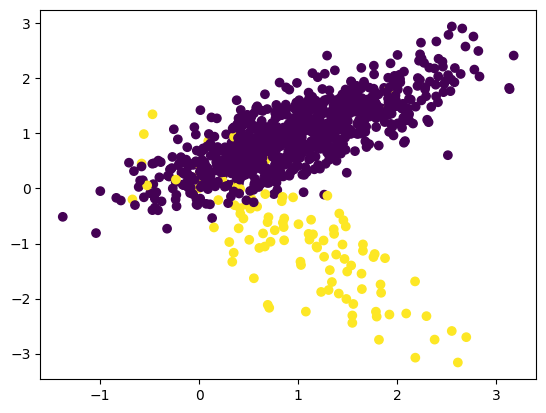

In [43]:
import matplotlib.pyplot as plt
plt.scatter(final_df["F1"],final_df["F2"],c=final_df["Target"])

In [44]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# Implementing Smote

from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['F1','F2']],final_df["Target"])
x.shape

(1788, 2)

In [49]:
y.shape

(1788,)

In [54]:
len(y[y==0])
len(x[x==1])

1788

In [55]:
df1=pd.DataFrame(x,columns=["F1","F2"])
df2=pd.DataFrame(y,columns=["Target"])
oversample_df=pd.concat([df1,df2],axis=1)
oversample_df

,F1,F2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,1.645696,-2.396596,1
1784,1.118318,-0.707752,1
1785,1.430029,-1.242711,1
1786,0.413829,-1.266566,1


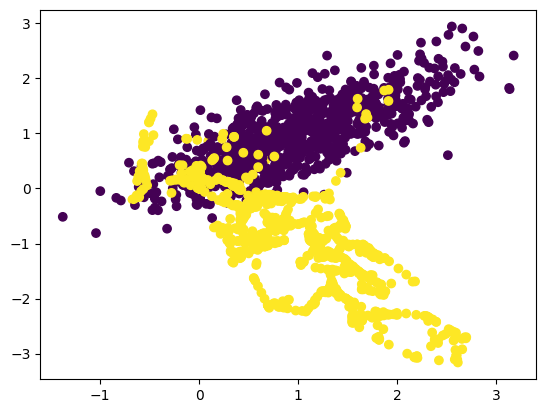

In [56]:
plt.scatter(oversample_df["F1"],oversample_df["F2"],c=oversample_df["Target"])

In [58]:
oversample_df[oversample_df.Target==1]

,F1,F2,Target
0,1.536830,-1.398694,1
8,2.552644,-2.588927,1
14,1.115618,-0.929017,1
17,1.558391,-2.098504,1
20,-0.672512,-0.198716,1
...,...,...,...
1783,1.645696,-2.396596,1
1784,1.118318,-0.707752,1
1785,1.430029,-1.242711,1
1786,0.413829,-1.266566,1
